In [ ]:
pip install torchsummary

In [ ]:
pip install torchvision

Importing libraries

In [ ]:
!git clone https://github.com/RashiTech/main_repo.git

Cloning into 'main_repo'...
remote: Enumerating objects: 94, done.
remote: Counting objects: 100% (94/94), done.
remote: Compressing objects: 100% (92/92), done.
remote: Total 94 (delta 50), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (94/94), 27.95 KiB | 5.59 MiB/s, done.
Resolving deltas: 100% (50/50), done.


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torchsummary import summary
from tqdm import tqdm
from torch.optim.lr_scheduler import StepLR, ReduceLROnPlateau
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import torchvision
import albumentations as A
from albumentations.pytorch import ToTensorV2

Updating Device to CUDA

In [ ]:
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)
device = torch.device("cuda" if cuda else "cpu")

CUDA Available? True


Importing custom modules

In [ ]:
from main_repo.models import resnet

In [ ]:
from main_repo.models.resnet import ResNet18

In [ ]:
from main_repo.utils import *

In [ ]:
from main_repo.train_test import *

**Downloading data , transforming it and creating train and test set**

100%|██████████| 170498071/170498071 [00:14<00:00, 11785625.01it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


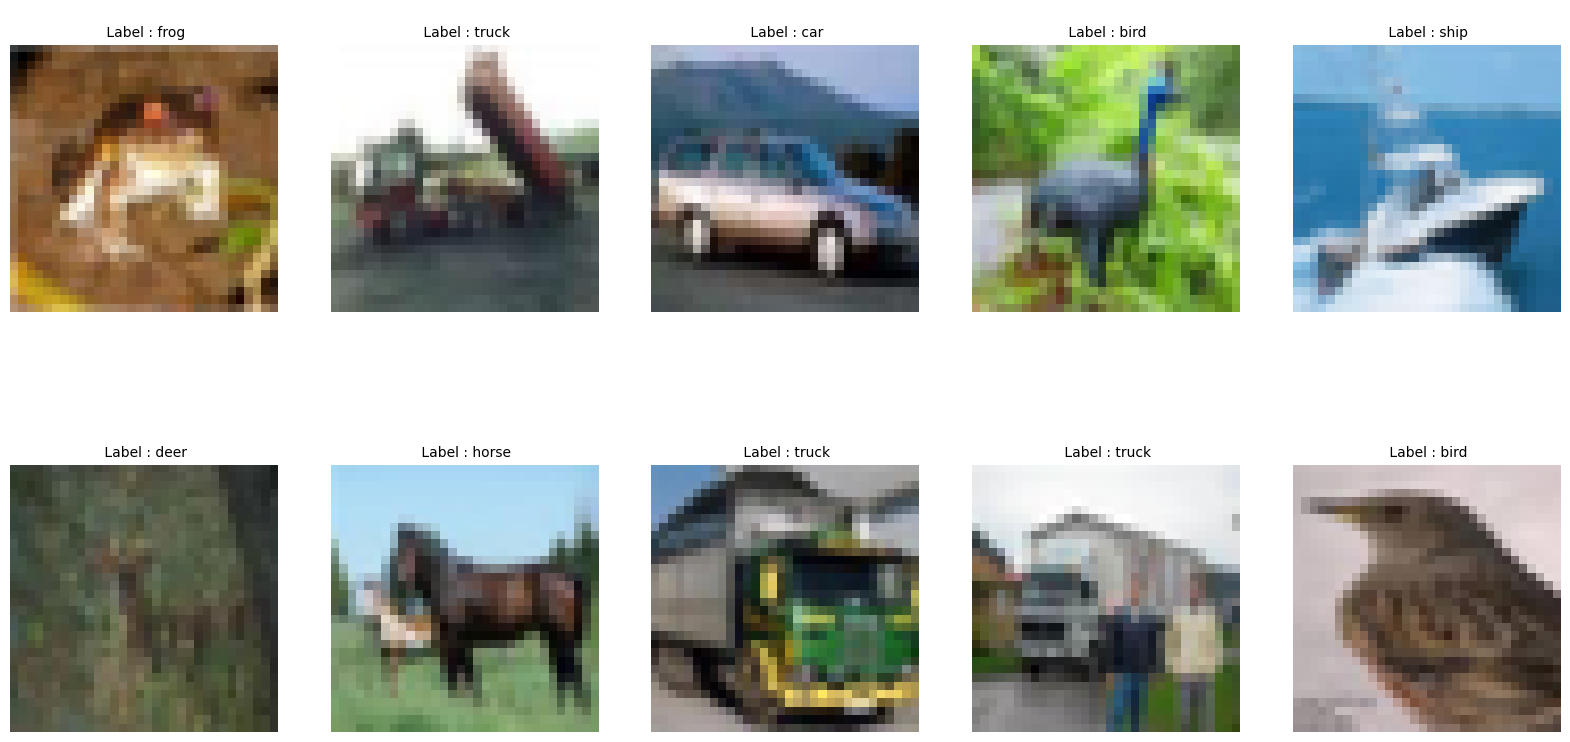

In [ ]:
trainset_mod, train_loader, testset_mod, test_loader =  process_dataset(batch_size = 512)

Downloading CIFAR 10 dataset and splitting to train and test set

In [ ]:
classes = ['plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
pip install torch_lr_finder

Transferring model to GPU and printing model summary

In [ ]:
model1 = ResNet18().to(device)
summary(model1, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

  0%|          | 0/200 [00:00<?, ?it/s]

Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 2.97E-01


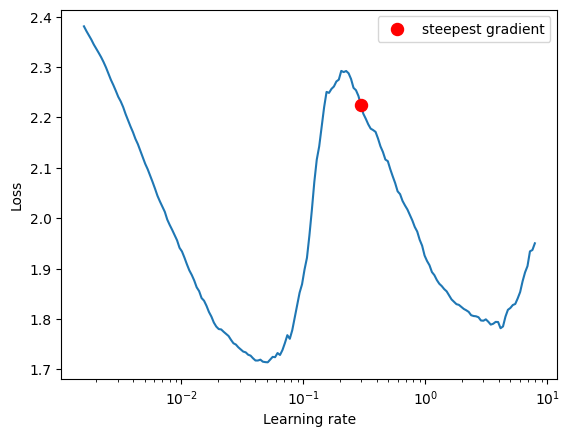

In [ ]:
from torch_lr_finder import LRFinder

model = ResNet18().to(device)
#optimizer_lr = optim.Adam(model.parameters(), lr=0.0005, weight_decay=1e-4)
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
criterion = nn.CrossEntropyLoss()
lr_finder = LRFinder(model, optimizer, criterion, device="cuda")
lr_finder.range_test(train_loader, end_lr=10, num_iter=200, step_mode="exp")
lr_finder.plot() # to inspect the loss-learning rate graph
lr_finder.reset() # to reset the model and optimizer to their initial state

In [ ]:
max_lr = 2.97E-01

In [ ]:
from tqdm import tqdm

train_losses = []
test_losses = []
train_acc = []
test_acc = []

Training and evaluating the model using One Cycle Policy

In [ ]:
#model1 =  ResNet18().to(device)
#optimizer = SGD(model.parameters(), lr=max_lr, momentum=0.9)
#criterion = F.cross_entropy()
#scheduler = StepLR(optimizer, step_size=6, gamma=0.10)
#scheduler = ReduceLROnPlateau(optimizer, 'min', factor=0.1, patience=10, threshold=0.0001, threshold_mode='abs')
from torch.optim.lr_scheduler import OneCycleLR

EPOCHS = 20
sched = 'OneCycle'
for epoch in range(EPOCHS):
    print("EPOCH:", epoch + 1)
    train(model, device, train_loader, optimizer, EPOCHS, sched, criterion,train_acc , train_losses,max_lr)
    test(model, device, test_loader, criterion,test_acc , test_losses)

EPOCH: 1


Loss=1.5882413387298584 Batch_id=97 Accuracy=35.90: 100%|██████████| 98/98 [00:46<00:00,  2.09it/s]



Test set: Average loss: 0.0035, Accuracy: 4350/10000 (43.50%)

EPOCH: 2


Loss=1.3018888235092163 Batch_id=97 Accuracy=51.56: 100%|██████████| 98/98 [00:45<00:00,  2.14it/s]



Test set: Average loss: 0.0028, Accuracy: 4939/10000 (49.39%)

EPOCH: 3


Loss=1.1257867813110352 Batch_id=97 Accuracy=59.85: 100%|██████████| 98/98 [00:46<00:00,  2.11it/s]



Test set: Average loss: 0.0025, Accuracy: 5587/10000 (55.87%)

EPOCH: 4


Loss=0.8982188701629639 Batch_id=97 Accuracy=65.37: 100%|██████████| 98/98 [00:48<00:00,  2.02it/s]



Test set: Average loss: 0.0021, Accuracy: 6371/10000 (63.71%)

EPOCH: 5


Loss=0.8197662830352783 Batch_id=97 Accuracy=70.33: 100%|██████████| 98/98 [00:46<00:00,  2.11it/s]



Test set: Average loss: 0.0016, Accuracy: 7183/10000 (71.83%)

EPOCH: 6


Loss=0.758735716342926 Batch_id=97 Accuracy=73.54: 100%|██████████| 98/98 [00:46<00:00,  2.11it/s]



Test set: Average loss: 0.0014, Accuracy: 7618/10000 (76.18%)

EPOCH: 7


Loss=0.6151573657989502 Batch_id=97 Accuracy=76.11: 100%|██████████| 98/98 [00:46<00:00,  2.13it/s]



Test set: Average loss: 0.0013, Accuracy: 7857/10000 (78.57%)

EPOCH: 8


Loss=0.655730128288269 Batch_id=97 Accuracy=78.32: 100%|██████████| 98/98 [00:46<00:00,  2.12it/s]



Test set: Average loss: 0.0012, Accuracy: 8079/10000 (80.79%)

EPOCH: 9


Loss=0.4900101125240326 Batch_id=97 Accuracy=79.61: 100%|██████████| 98/98 [00:46<00:00,  2.12it/s]



Test set: Average loss: 0.0013, Accuracy: 7803/10000 (78.03%)

EPOCH: 10


Loss=0.5887566804885864 Batch_id=97 Accuracy=81.30: 100%|██████████| 98/98 [00:46<00:00,  2.12it/s]



Test set: Average loss: 0.0016, Accuracy: 7468/10000 (74.68%)

EPOCH: 11


Loss=0.46600478887557983 Batch_id=97 Accuracy=82.29: 100%|██████████| 98/98 [00:46<00:00,  2.12it/s]



Test set: Average loss: 0.0011, Accuracy: 8173/10000 (81.73%)

EPOCH: 12


Loss=0.5950484275817871 Batch_id=97 Accuracy=83.43: 100%|██████████| 98/98 [00:46<00:00,  2.12it/s]



Test set: Average loss: 0.0013, Accuracy: 7971/10000 (79.71%)

EPOCH: 13


Loss=0.4464109539985657 Batch_id=97 Accuracy=84.25: 100%|██████████| 98/98 [00:46<00:00,  2.13it/s]



Test set: Average loss: 0.0010, Accuracy: 8257/10000 (82.57%)

EPOCH: 14


Loss=0.41724151372909546 Batch_id=97 Accuracy=85.02: 100%|██████████| 98/98 [00:46<00:00,  2.12it/s]



Test set: Average loss: 0.0011, Accuracy: 8323/10000 (83.23%)

EPOCH: 15


Loss=0.4487001895904541 Batch_id=97 Accuracy=85.83: 100%|██████████| 98/98 [00:46<00:00,  2.11it/s]



Test set: Average loss: 0.0010, Accuracy: 8320/10000 (83.20%)

EPOCH: 16


Loss=0.41427671909332275 Batch_id=97 Accuracy=86.60: 100%|██████████| 98/98 [00:46<00:00,  2.13it/s]



Test set: Average loss: 0.0010, Accuracy: 8381/10000 (83.81%)

EPOCH: 17


Loss=0.4018975794315338 Batch_id=97 Accuracy=87.28: 100%|██████████| 98/98 [00:45<00:00,  2.13it/s]



Test set: Average loss: 0.0010, Accuracy: 8421/10000 (84.21%)

EPOCH: 18


Loss=0.39129334688186646 Batch_id=97 Accuracy=87.85: 100%|██████████| 98/98 [00:45<00:00,  2.13it/s]



Test set: Average loss: 0.0011, Accuracy: 8344/10000 (83.44%)

EPOCH: 19


Loss=0.49958834052085876 Batch_id=97 Accuracy=88.39: 100%|██████████| 98/98 [00:46<00:00,  2.11it/s]



Test set: Average loss: 0.0011, Accuracy: 8335/10000 (83.35%)

EPOCH: 20


Loss=0.3610652983188629 Batch_id=97 Accuracy=88.51: 100%|██████████| 98/98 [00:46<00:00,  2.11it/s]



Test set: Average loss: 0.0011, Accuracy: 8341/10000 (83.41%)



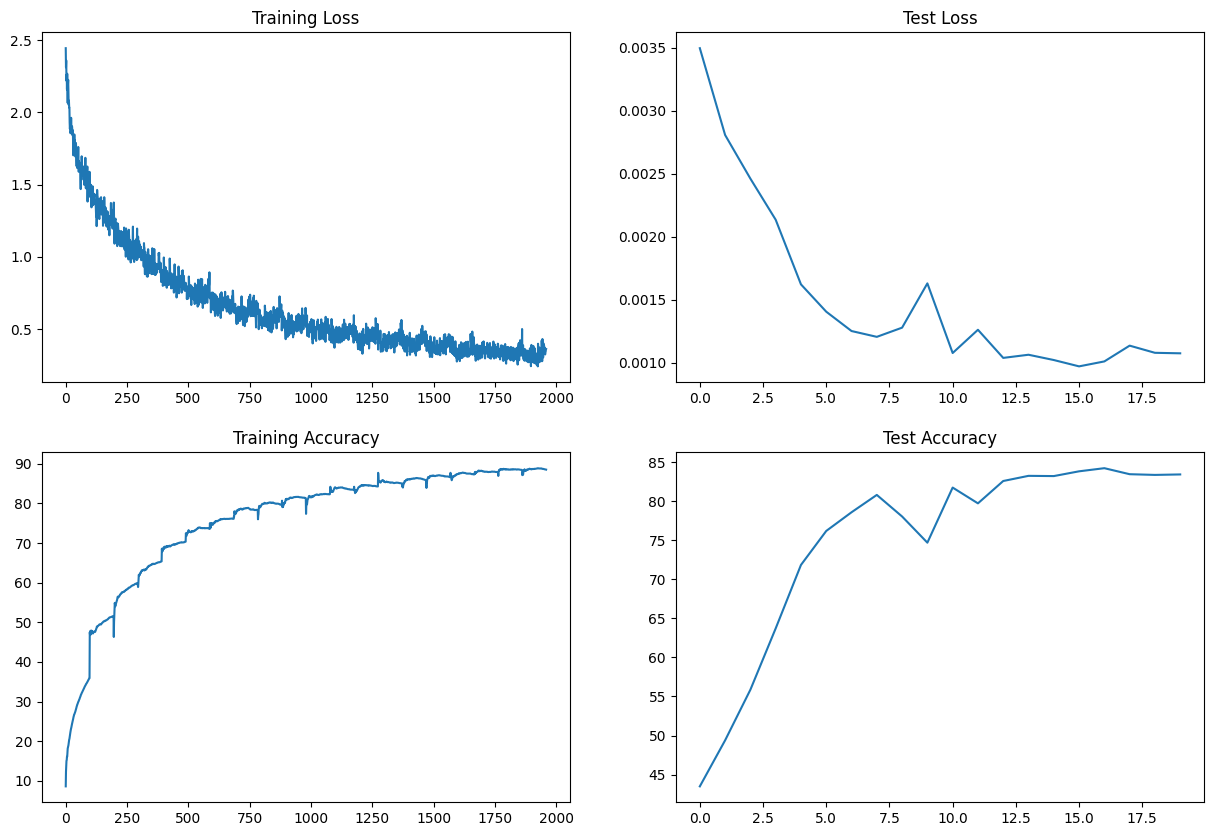

In [ ]:
train_losses = [t_items.item() for t_items in train_losses]
plot_graphs(train_losses, train_acc, test_losses ,test_acc)

Mis-predicted Images

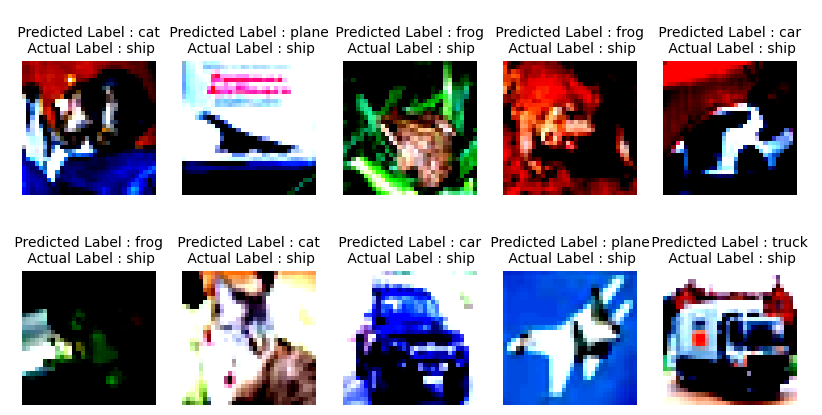

In [ ]:
wrong_prediction_list = get_incorrrect_predictions(model1, test_loader, device)

display_incorrect_images(wrong_prediction_list, n=10 )

GRADCAM

In [ ]:
target_layers = ["layer1","layer2","layer3","layer4"] # channel size 8X8
torch.autograd.set_detect_anomaly(True)
image_size = (3,32,32)

In [ ]:
gcam_layers, probs, pred_class= generate_gradcam(wrong_prediction_list[:10], model1, target_layers,device)

torch.Size([10, 10])
Generating Grad-CAM @layer1
Generating Grad-CAM @layer2
Generating Grad-CAM @layer3
Generating Grad-CAM @layer4


Files already downloaded and verified
Files already downloaded and verified


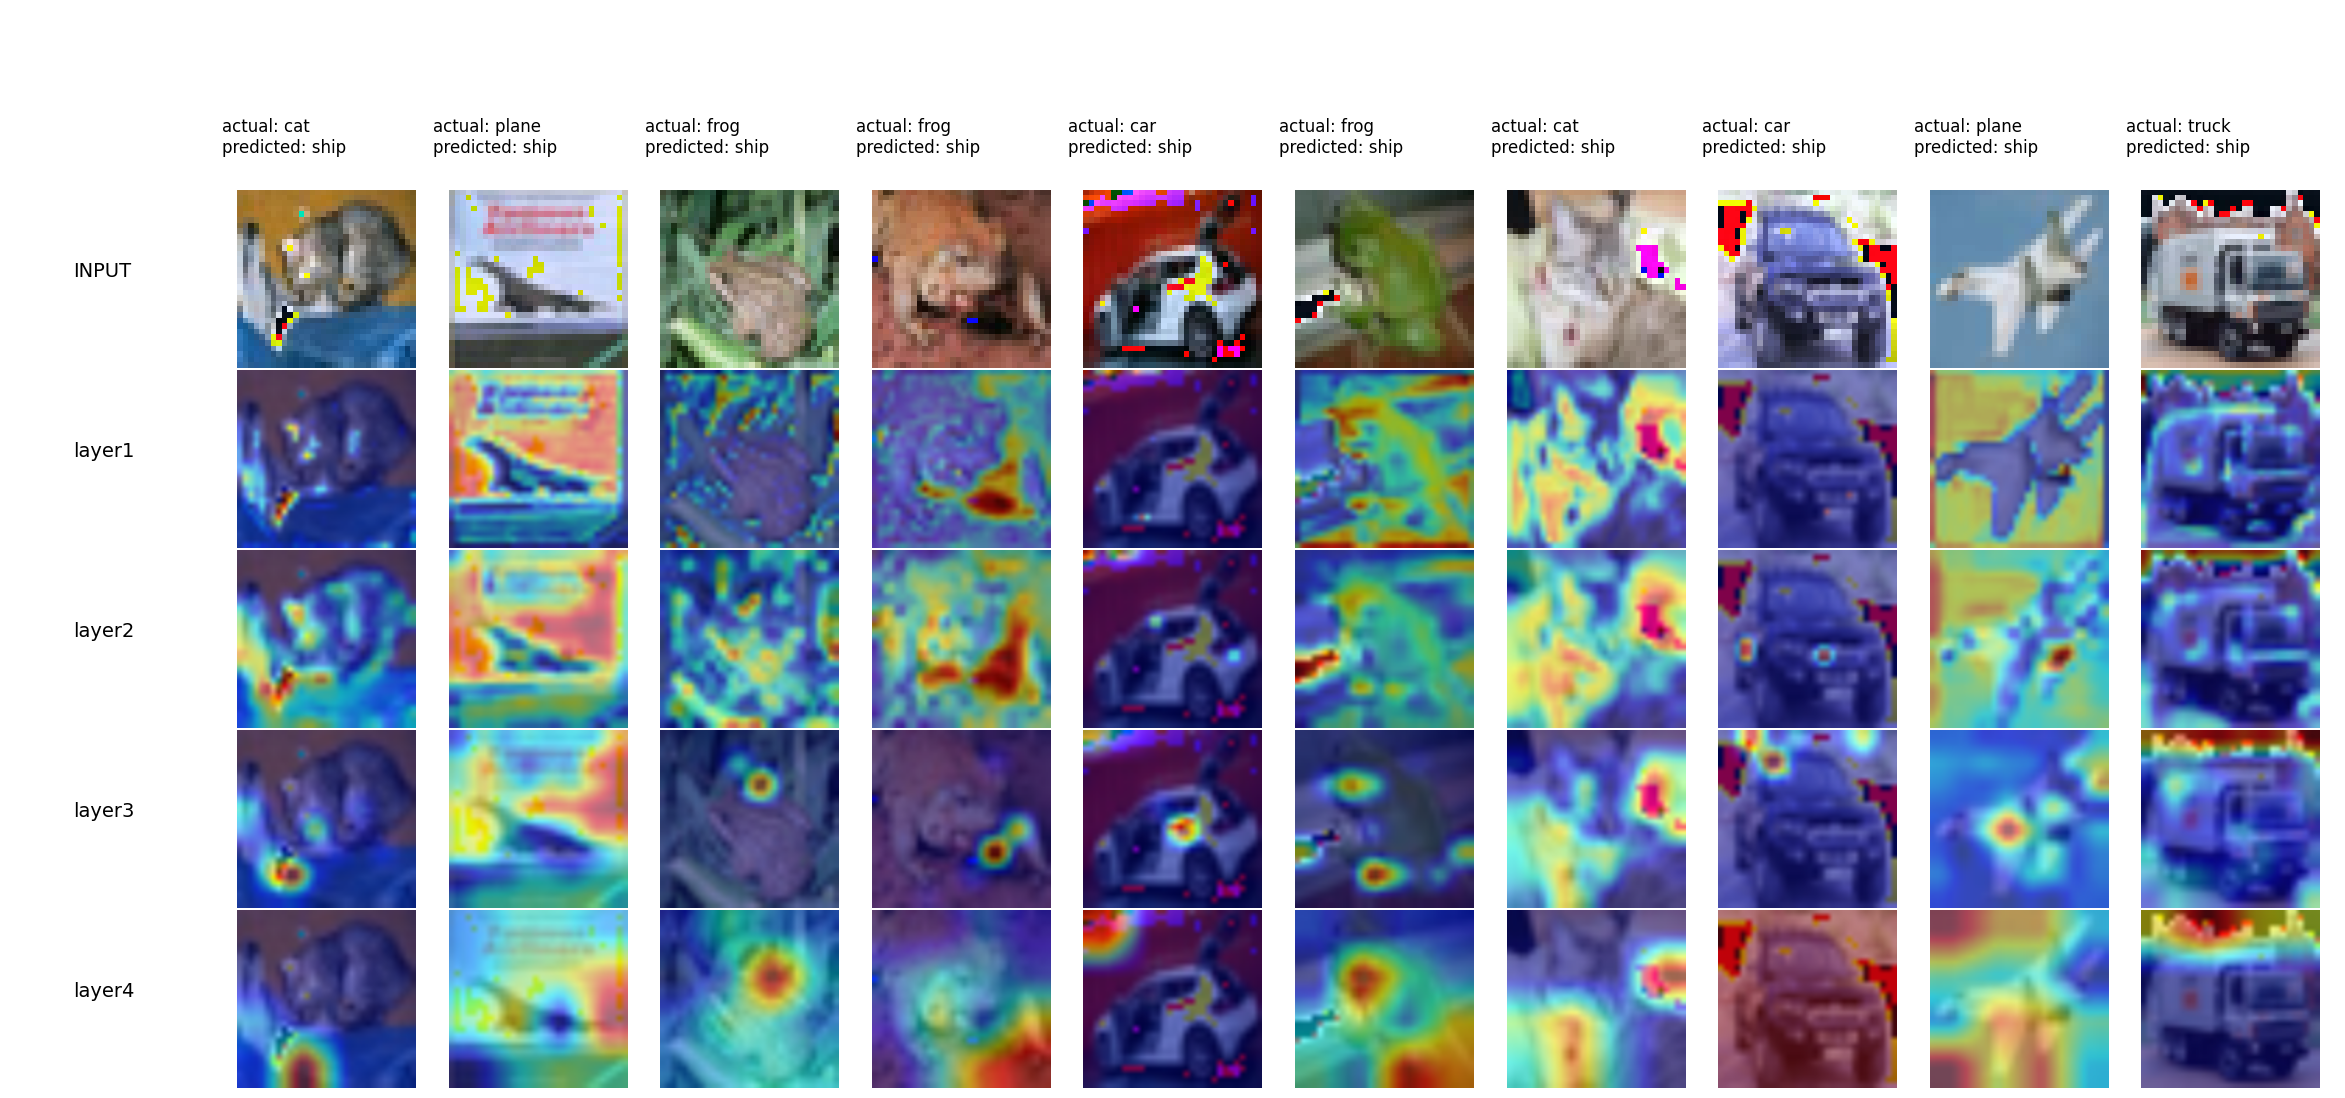

In [ ]:
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plot_gradcam(gcam_layers, target_layers, classes, image_size ,pred_class, wrong_prediction_list[:10])